In [ ]:
#Scholarship:  Likely refers to any scholarships the student may have received (Yes/No)
#Fav_sub: Student's favorite subject (e.g., Mathematics,Science,Any language,History/Geography)
#Projects: Number of projects the student has participated in (possibly Science or Engineering related)
#Grasp_pow: Student's grasping power, possibly referring to their ability to learn new concepts quickly
#Time_sprt: Time spent participating in sports (e.g., hours per week)
#Medals: medals the student has won in sports competitions(Yes/No)
#Career_sprt: Interest in pursuing a sports career (Yes/No)
#Act_sprt: Interest in participating in sports for fun (Yes/No)
#Fant_arts: Interest in creative arts (e.g., drawing, writing) (Yes/No)
#Won_arts: Number of awards or recognition received in arts competitions (Maybe,No)
#Time_art: Time spent participating in artistic activities (e.g., hours per week)
#Predicted Hobby: Possibly a machine learning prediction based on the data about the student's potential preferred hobby

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [ ]:
df = pd.read_csv('/content/Hobby_Data.csv',skipinitialspace=True)
df.head()

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Grasp_pow,Time_sprt,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Predicted Hobby
0,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
1,Yes,Yes,Yes,Mathematics,Yes,3,2,No,No,No,No,No,1,Academics
2,Yes,Yes,Yes,Science,Yes,5,1,Yes,No,No,No,No,1,Academics
3,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
4,Yes,Yes,Yes,Science,Yes,5,3,No,No,No,No,No,2,Academics


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Olympiad_Participation  1601 non-null   object
 1   Scholarship             1601 non-null   object
 2   School                  1601 non-null   object
 3   Fav_sub                 1601 non-null   object
 4   Projects                1601 non-null   object
 5   Grasp_pow               1601 non-null   int64 
 6   Time_sprt               1601 non-null   int64 
 7   Medals                  1601 non-null   object
 8   Career_sprt             1601 non-null   object
 9   Act_sprt                1601 non-null   object
 10  Fant_arts               1601 non-null   object
 11  Won_arts                1601 non-null   object
 12  Time_art                1601 non-null   int64 
 13  Predicted Hobby         1601 non-null   object
dtypes: int64(3), object(11)
memory usage: 175.2+ KB


In [ ]:
df.isnull().sum()

Olympiad_Participation    0
Scholarship               0
School                    0
Fav_sub                   0
Projects                  0
Grasp_pow                 0
Time_sprt                 0
Medals                    0
Career_sprt               0
Act_sprt                  0
Fant_arts                 0
Won_arts                  0
Time_art                  0
Predicted Hobby           0
dtype: int64

In [ ]:
df['Fav_sub'].value_counts()

Mathematics          680
Science              515
Any language         288
History/Geography    118
Name: Fav_sub, dtype: int64

In [ ]:
df.describe(include=object)

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Predicted Hobby
count,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601
unique,2,2,2,4,2,2,2,2,2,3,3
top,Yes,No,Yes,Mathematics,Yes,Yes,No,Yes,No,No,Academics
freq,822,933,1160,680,926,844,1005,891,908,833,699


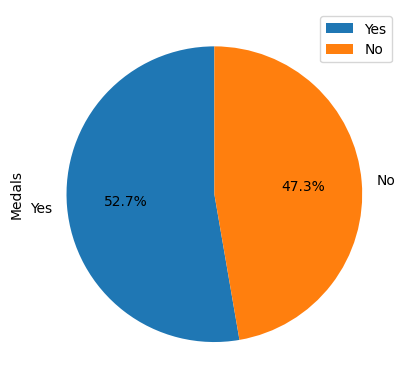

In [ ]:
df['Medals'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
plt.legend()
plt.show()

In [ ]:
fig=px.bar(df['Predicted Hobby'].value_counts(), labels={'index': 'Predicted Hobby', 'value': 'Count'})
fig.show()

In [ ]:
fig = px.pie(names=df['Scholarship'].value_counts().index, values=df['Scholarship'].value_counts().values,title='Given scholarship for the childrens')
fig.show()

In [ ]:
fig = px.bar(df,x='Fav_sub',y='Grasp_pow',title='Subjects based on Grasping power',color='Fav_sub')
fig.update_layout(showlegend=True)
fig.show()

In [ ]:
fig=px.bar(df,x='Fav_sub',y='Scholarship',color='Fav_sub',title='Scholarship based on fav_subject', labels={'Fav_sub': 'Fav_sub', 'Scholarship': 'Scholarship'})
fig.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Grasp_pow,Time_sprt,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Predicted Hobby
0,1,1,1,2,1,5,1,1,0,0,0,0,3,0
1,1,1,1,2,1,3,2,0,0,0,0,1,1,0
2,1,1,1,3,1,5,1,1,0,0,0,1,1,0
3,1,1,1,2,1,5,1,1,0,0,0,0,3,0
4,1,1,1,3,1,5,3,0,0,0,0,1,2,0


In [ ]:
x = df.drop(['Predicted Hobby'],axis='columns')
y = df['Predicted Hobby']

In [ ]:
for i in x:
    fig = px.density_heatmap(df, x=i, y=y, template='ggplot2',title=f"Density Heatmap of {i}",height=300)
    fig.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)
lomodel = LogisticRegression()
lomodel.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lomodel.predict(x_test)
accuracy_score(y_pred,y_test)

0.8902743142144638

In [ ]:
lomodel.predict(x_test[:10])

array([0, 1, 1, 1, 2, 2, 2, 0, 1, 0])

In [ ]:
y_test[:10]

486     0
759     1
829     1
1004    1
1322    2
1159    2
1284    2
415     0
679     0
279     0
Name: Predicted Hobby, dtype: int64